### Complement and Conorm-t Operators Visualization

In this section, we visualize the behavior of the complement operator $C(a)$ and the conorm-t operator $S(a, b)$ for different values of $\beta$.

The complement operator is computed as:

$$
C(a) = g^{-1}(1 - g(a, \beta), \beta)
$$

Where the generator function is:

$$
g(a, \beta) = \frac{\ln(1 + a \beta)}{\ln(1 + \beta)}
$$

And its inverse is:

$$
g^{-1}(x, \beta) = \frac{e^{x \ln(1 + \beta)} - 1}{\beta}
$$

The conorm-t operator is defined as:

$$
S(a, b) = g^{-1} \left( \min \left( 1, g(a, \beta) + g(b, \beta) \right), \beta \right)
$$

We plot these functions for various values of $\beta$ to understand how it affects the shape of $C(a)$ and $S(a, b)$.


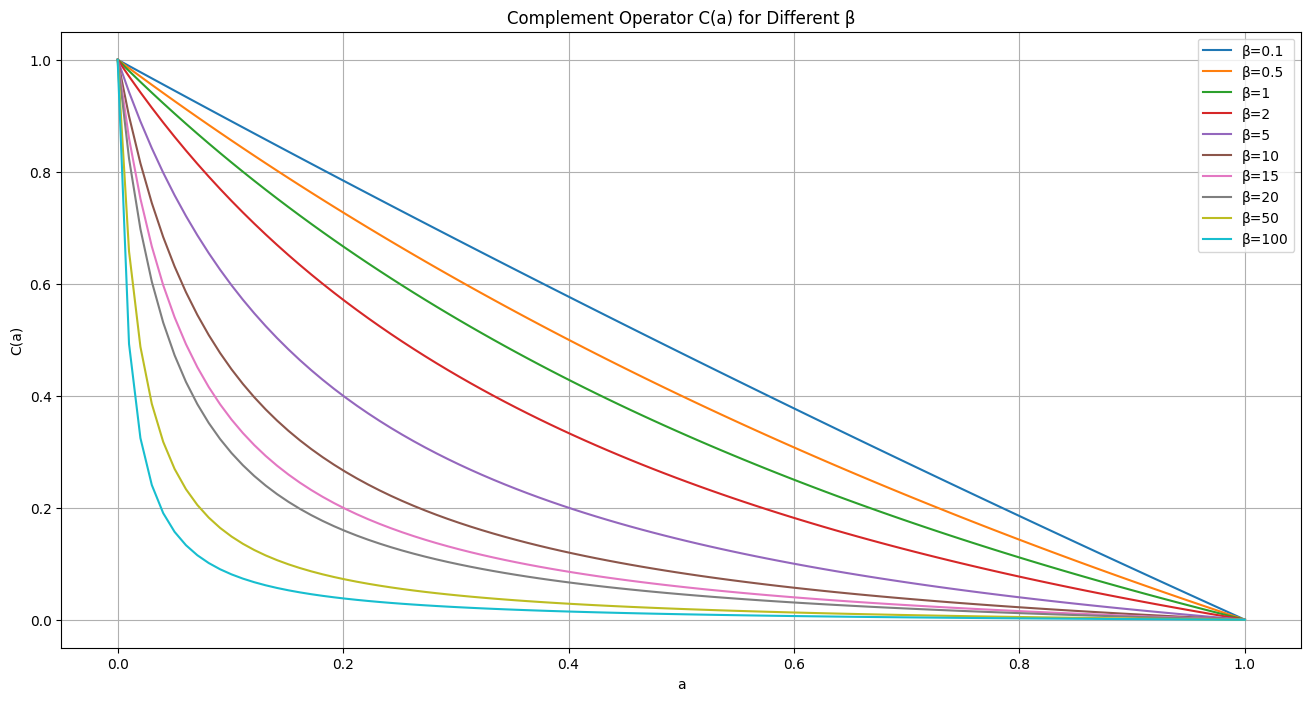

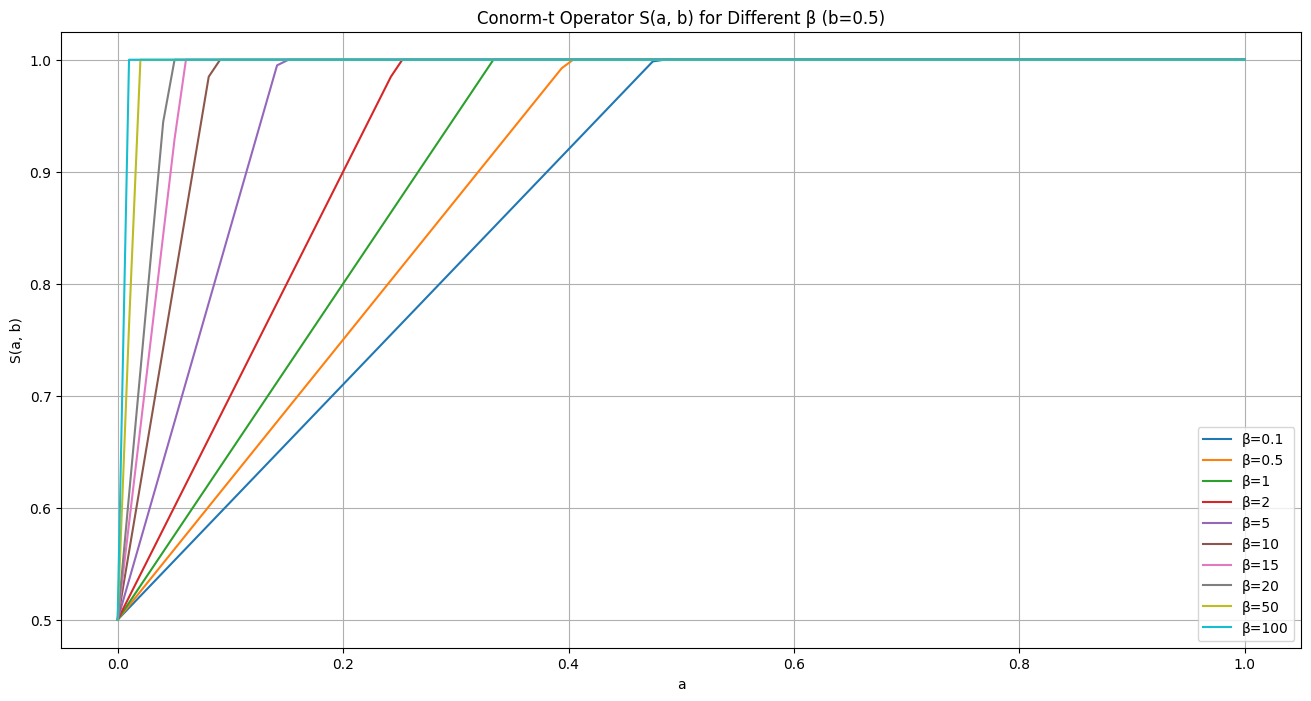

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع مولد g(a)
def g(a, beta):
    return np.log(1 + a * beta) / np.log(1 + beta)

# معکوس تابع مولد g^-1(x)
def g_inverse(x, beta):
    return (np.exp(x * np.log(1 + beta)) - 1) / beta

# عملگر مکمل C(a)
def complement(a, beta):
    return g_inverse(1 - g(a, beta), beta)

# عملگر conorm-t S(a, b)
def conorm_t(a, b, beta):
    ga, gb = g(a, beta), g(b, beta)
    return g_inverse(min(1, ga + gb), beta)

# مقادیر a و b برای رسم نمودار
a_vals = np.linspace(0, 1, 100)
b_vals = np.linspace(0, 1, 100)

# مقادیر مختلف β
beta_vals = [0.1, 0.5, 1, 2, 5, 10, 15, 20, 50, 100]

# رسم نمودار
plt.figure(figsize=(16, 8))

# رسم C(a) برای مقادیر مختلف β
for beta in beta_vals:
    c_vals = complement(a_vals, beta)
    plt.plot(a_vals, c_vals, label=f"β={beta}")

plt.title("Complement Operator C(a) for Different β")
plt.xlabel("a")
plt.ylabel("C(a)")
plt.legend()
plt.grid()
plt.show()

# رسم S(a, b) برای مقادیر مختلف β و b ثابت
plt.figure(figsize=(16, 8))
b_fixed = 0.5  # مقدار ثابت برای b
for beta in beta_vals:
    s_vals = [conorm_t(a, b_fixed, beta) for a in a_vals]
    plt.plot(a_vals, s_vals, label=f"β={beta}")

plt.title(f"Conorm-t Operator S(a, b) for Different β (b={b_fixed})")
plt.xlabel("a")
plt.ylabel("S(a, b)")
plt.legend()
plt.grid()
plt.show()


### Visualization of Fuzzy Set Operations: B - A and A * B

In this section, we define two fuzzy membership functions $A(x)$ and $B(x)$, then compute and visualize:

- The fuzzy difference: $ (B - A)(x) = \max(0, B(x) - A(x)) $
- The fuzzy intersection: $ (A * B)(x) = \min(A(x), B(x)) $

These operations help us understand how fuzzy sets interact through basic set operations.


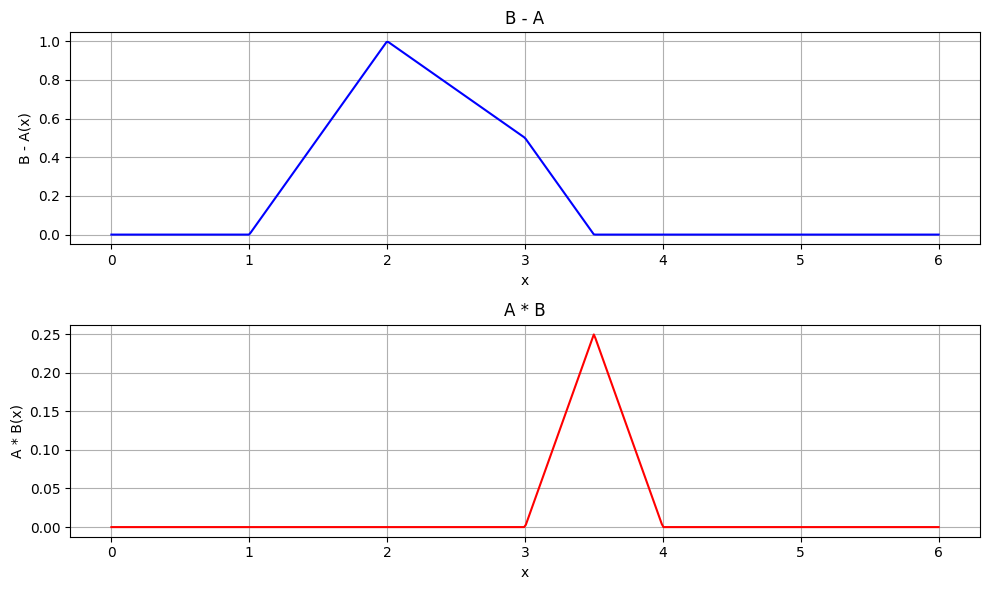

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع عضویت A(x)
def A(x):
    return np.piecewise(x, [x <= 3, (3 < x) & (x <= 5), (5 < x) & (x <= 6), x > 6],
                        [0, lambda x: (x - 3) / 2, lambda x: (6 - x) / 2, 0])

# تابع عضویت B(x)
def B(x):
    return np.piecewise(x, [x <= 1, (1 < x) & (x <= 2), (2 < x) & (x <= 4), x > 4],
                        [0, lambda x: x - 1, lambda x: (4 - x) / 2, 0])

# محاسبه B - A
def B_minus_A(x):
    return np.maximum(0, B(x) - A(x))

# محاسبه A * B
def A_dot_B(x):
    return np.minimum(A(x), B(x))

# بازه x برای رسم نمودار
x = np.linspace(0, 6, 500)

# محاسبه مقادیر برای B - A و A * B
B_A_values = B_minus_A(x)
A_B_values = A_dot_B(x)

# رسم نمودارها
plt.figure(figsize=(10, 6))

# نمودار B - A
plt.subplot(2, 1, 1)
plt.plot(x, B_A_values, label="B - A", color='blue')
plt.title("B - A")
plt.xlabel("x")
plt.ylabel("B - A(x)")
plt.grid(True)

# نمودار A * B
plt.subplot(2, 1, 2)
plt.plot(x, A_B_values, label="A * B", color='red')
plt.title("A * B")
plt.xlabel("x")
plt.ylabel("A * B(x)")
plt.grid(True)

# نمایش نمودارها
plt.tight_layout()
plt.show()


### Fuzzy Evaluation of Linguistic Propositions Using Membership Functions

This section evaluates the truth degree of two fuzzy propositions:

- (a) "Most tall students have high BMI"
- (b) "Most students with high BMI are tall"

For each student, we calculate fuzzy membership values for "tall" based on height, and "high BMI" based on BMI. Then we compute the truth degree of each proposition using:

- $ \text{Truth}_a = \dfrac{\sum \min(\mu_{\text{tall}}, \mu_{\text{high BMI}})}{\sum \mu_{\text{tall}}} $
- $ \text{Truth}_b = \dfrac{\sum \min(\mu_{\text{high BMI}}, \mu_{\text{tall}})}{\sum \mu_{\text{high BMI}}} $

The results are visualized with separate membership plots for height and BMI.


میزان درستی گزاره (الف): 0.343
میزان درستی گزاره (ب): 0.462


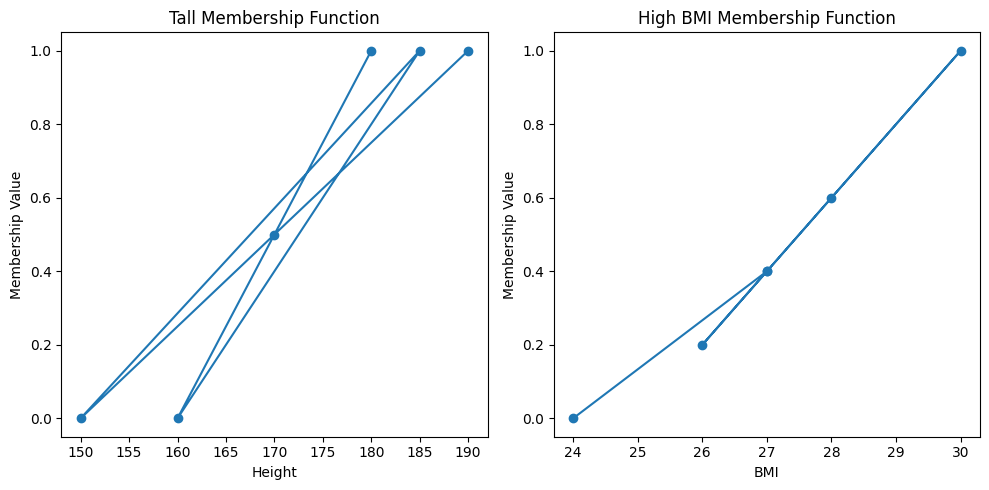

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# داده‌های دانشجویان
students = [
    {"height": 180, "bmi": 27},
    {"height": 170, "bmi": 26},
    {"height": 160, "bmi": 30},
    {"height": 185, "bmi": 28},
    {"height": 150, "bmi": 27},
    {"height": 190, "bmi": 24}
]

# تابع عضویت برای بلند قد
def mu_tall(height):
    if height <= 160:
        return 0
    elif 160 < height <= 180:
        return (height - 160) / 20
    else:
        return 1

# تابع عضویت برای توده بدنی بالا
def mu_high_bmi(bmi):
    if bmi <= 25:
        return 0
    elif 25 < bmi <= 30:
        return (bmi - 25) / 5
    else:
        return 1

# محاسبه مقادیر عضویت برای هر دانشجو
mu_tall_values = [mu_tall(student["height"]) for student in students]
mu_high_bmi_values = [mu_high_bmi(student["bmi"]) for student in students]

# محاسبه میزان درستی گزاره (الف)
numerator_a = sum(min(mu_tall_values[i], mu_high_bmi_values[i]) for i in range(len(students)))
denominator_a = sum(mu_tall_values)
truth_a = numerator_a / denominator_a

# محاسبه میزان درستی گزاره (ب)
numerator_b = sum(min(mu_high_bmi_values[i], mu_tall_values[i]) for i in range(len(students)))
denominator_b = sum(mu_high_bmi_values)
truth_b = numerator_b / denominator_b

# چاپ نتایج
print(f"میزان درستی گزاره (الف): {truth_a:.3f}")
print(f"میزان درستی گزاره (ب): {truth_b:.3f}")

# رسم نمودار
heights = [student["height"] for student in students]
bmis = [student["bmi"] for student in students]

# رسم نمودار مقادیر عضویت
plt.figure(figsize=(10, 5))

# نمودار بلند قد
plt.subplot(1, 2, 1)
plt.plot(heights, mu_tall_values, 'o-', label='Tall Membership')
plt.xlabel('Height')
plt.ylabel('Membership Value')
plt.title('Tall Membership Function')

# نمودار توده بدنی بالا
plt.subplot(1, 2, 2)
plt.plot(bmis, mu_high_bmi_values, 'o-', label='High BMI Membership')
plt.xlabel('BMI')
plt.ylabel('Membership Value')
plt.title('High BMI Membership Function')

plt.tight_layout()
plt.show()


### Fuzzy Inference and Defuzzification Using Mamdani Approach

In this section, we implement a fuzzy inference system using the Mamdani method to estimate the value of a variable called **POL** based on four inputs:

- STA: Software Technical Ability
- HTA: Hardware Technical Ability
- SE: Software Experience
- HE: Hardware Experience

Each input is mapped to linguistic variables (e.g., *new*, *medium*, *old*) using membership functions.

Fuzzy rules used:
1. If STA is new or HTA is new or SE is low or HE is medium → POL is low
2. If STA is old and HTA is medium and SE is high → POL is medium
3. If STA is old and (HTA is medium and SE is high and HE is medium) → POL is high

After computing the fuzzy outputs, the final crisp value of **POL** is calculated using the **center-of-area (centroid)** method:

- $ \text{Crisp POL} = \dfrac{\sum_{i} \mu_i \cdot o_i}{\sum_i \mu_i} $

Where \( \mu_i \) are the activation degrees and \( o_i \) the representative values for the linguistic outputs (e.g., 250, 500, 1000).


مقدار کریسپ خروجی POL: 586.4833906071019


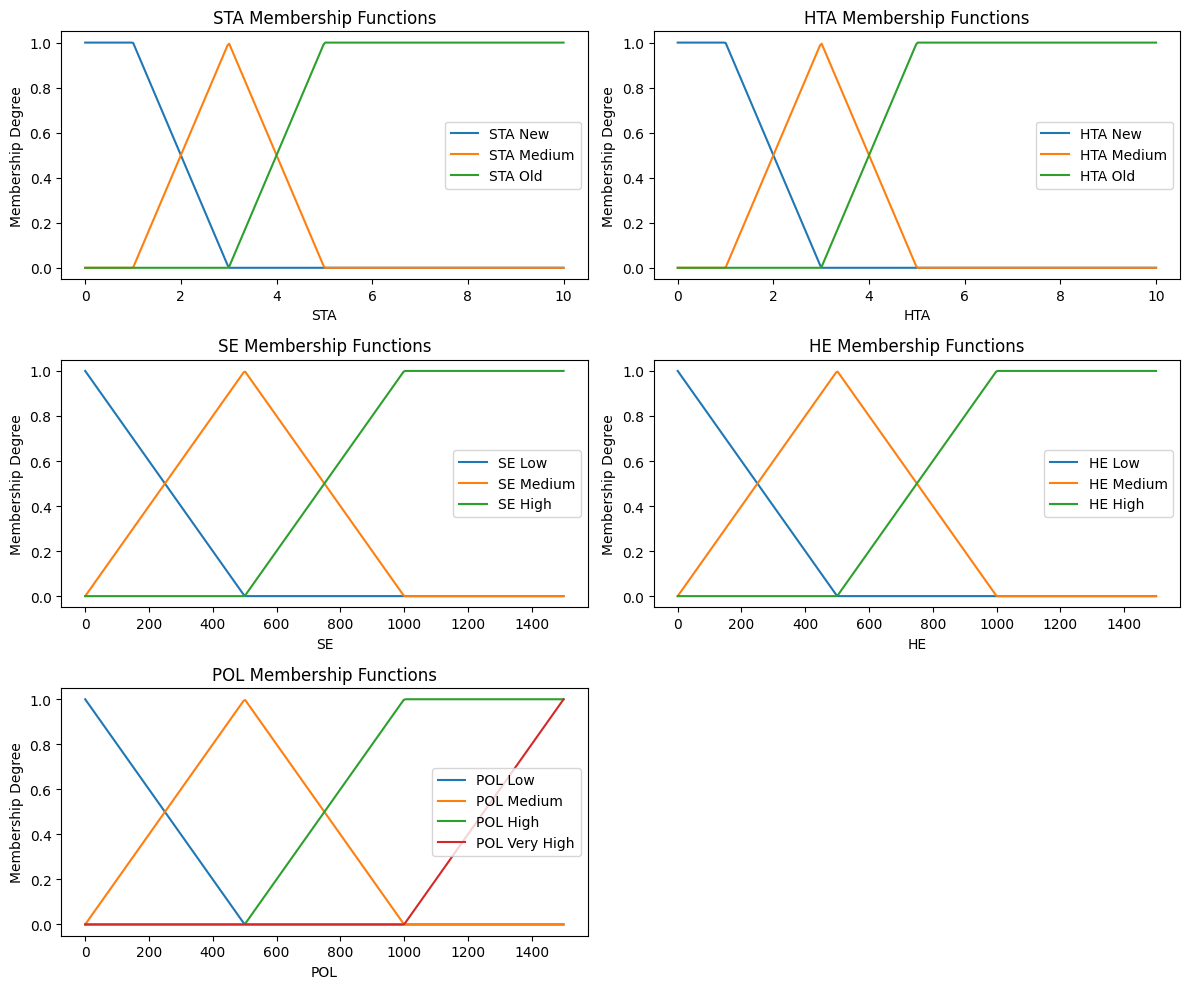

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع عضویت برای STA
def sta_membership(x):
    new = np.clip((3 - x) / (3 - 1), 0, 1)
    medium = np.clip(np.minimum((x - 1) / (3 - 1), (5 - x) / (5 - 3)), 0, 1)
    old = np.clip((x - 3) / (5 - 3), 0, 1)
    return new, medium, old

# تابع عضویت برای HTA
def hta_membership(x):
    new = np.clip((3 - x) / (3 - 1), 0, 1)
    medium = np.clip(np.minimum((x - 1) / (3 - 1), (5 - x) / (5 - 3)), 0, 1)
    old = np.clip((x - 3) / (5 - 3), 0, 1)
    return new, medium, old

# تابع عضویت برای SE
def se_membership(x):
    low = np.clip((500 - x) / 500, 0, 1)
    medium = np.clip(np.minimum(x / 500, (1000 - x) / 500), 0, 1)
    high = np.clip((x - 500) / 500, 0, 1)
    return low, medium, high

# تابع عضویت برای HE
def he_membership(x):
    low = np.clip((500 - x) / 500, 0, 1)
    medium = np.clip(np.minimum(x / 500, (1000 - x) / 500), 0, 1)
    high = np.clip((x - 500) / 500, 0, 1)
    return low, medium, high

# تابع عضویت برای POL
def pol_membership(x):
    low = np.clip((500 - x) / 500, 0, 1)
    medium = np.clip(np.minimum(x / 500, (1000 - x) / 500), 0, 1)
    high = np.clip((x - 500) / 500, 0, 1)
    very_high = np.clip((x - 1000) / 500, 0, 1)
    return low, medium, high, very_high

# ورودی‌ها
x1 = 4.5  # STA
x2 = 2    # HTA
x3 = 52   # SE
x4 = 50   # HE

# محاسبه توابع عضویت
sta_new, sta_medium, sta_old = sta_membership(x1)
hta_new, hta_medium, hta_old = hta_membership(x2)
se_low, se_medium, se_high = se_membership(x3)
he_low, he_medium, he_high = he_membership(x4)

# استنتاج فازی
# قانون 1
mu_low = max(sta_new, hta_new, se_low, he_medium)

# قانون 2
mu_medium = max(min(sta_old, hta_medium, se_high), he_medium)

# قانون 3
mu_high = max(sta_old, min(hta_medium, se_high, he_medium))

# محاسبه مقدار کریسپ با استفاده از center-of-area
# خروجی‌ها
outputs = [250, 500, 1000]
mus = [mu_low, mu_medium, mu_high]

# محاسبه مقدار کریسپ
weighted_sum = sum(o * mu for o, mu in zip(outputs, mus))
sum_mus = sum(mus)

if sum_mus > 0:
    crisp_value = weighted_sum / sum_mus
else:
    crisp_value = None

# نمایش نتایج
print(f"مقدار کریسپ خروجی POL: {crisp_value}")

# رسم نمودار توابع عضویت
x_values_sta_hta = np.linspace(0, 10, 300)  # برای STA و HTA

# توابع عضویت STA
sta_new_vals = [sta_membership(x)[0] for x in x_values_sta_hta]
sta_medium_vals = [sta_membership(x)[1] for x in x_values_sta_hta]
sta_old_vals = [sta_membership(x)[2] for x in x_values_sta_hta]

# توابع عضویت HTA
hta_new_vals = [hta_membership(x)[0] for x in x_values_sta_hta]
hta_medium_vals = [hta_membership(x)[1] for x in x_values_sta_hta]
hta_old_vals = [hta_membership(x)[2] for x in x_values_sta_hta]

# توابع عضویت SE
x_values_se_he = np.linspace(0, 1500, 300)  # برای SE و HE
se_low_vals = [se_membership(x)[0] for x in x_values_se_he]
se_medium_vals = [se_membership(x)[1] for x in x_values_se_he]
se_high_vals = [se_membership(x)[2] for x in x_values_se_he]

# توابع عضویت HE
he_low_vals = [he_membership(x)[0] for x in x_values_se_he]
he_medium_vals = [he_membership(x)[1] for x in x_values_se_he]
he_high_vals = [he_membership(x)[2] for x in x_values_se_he]

# توابع عضویت POL
pol_low_vals = [pol_membership(x)[0] for x in x_values_se_he]
pol_medium_vals = [pol_membership(x)[1] for x in x_values_se_he]
pol_high_vals = [pol_membership(x)[2] for x in x_values_se_he]
pol_very_high_vals = [pol_membership(x)[3] for x in x_values_se_he]

# رسم نمودار
plt.figure(figsize=(12, 10))

# نمودار توابع عضویت STA
plt.subplot(3, 2, 1)
plt.plot(x_values_sta_hta, sta_new_vals, label='STA New')
plt.plot(x_values_sta_hta, sta_medium_vals, label='STA Medium')
plt.plot(x_values_sta_hta, sta_old_vals, label='STA Old')
plt.title('STA Membership Functions')
plt.xlabel('STA')
plt.ylabel('Membership Degree')
plt.legend()

# نمودار توابع عضویت HTA
plt.subplot(3, 2, 2)
plt.plot(x_values_sta_hta, hta_new_vals, label='HTA New')
plt.plot(x_values_sta_hta, hta_medium_vals, label='HTA Medium')
plt.plot(x_values_sta_hta, hta_old_vals, label='HTA Old')
plt.title('HTA Membership Functions')
plt.xlabel('HTA')
plt.ylabel('Membership Degree')
plt.legend()

# نمودار توابع عضویت SE
plt.subplot(3, 2, 3)
plt.plot(x_values_se_he, se_low_vals, label='SE Low')
plt.plot(x_values_se_he, se_medium_vals, label='SE Medium')
plt.plot(x_values_se_he, se_high_vals, label='SE High')
plt.title('SE Membership Functions')
plt.xlabel('SE')
plt.ylabel('Membership Degree')
plt.legend()

# نمودار توابع عضویت HE
plt.subplot(3, 2, 4)
plt.plot(x_values_se_he, he_low_vals, label='HE Low')
plt.plot(x_values_se_he, he_medium_vals, label='HE Medium')
plt.plot(x_values_se_he, he_high_vals, label='HE High')
plt.title('HE Membership Functions')
plt.xlabel('HE')
plt.ylabel('Membership Degree')
plt.legend()

# نمودار توابع عضویت POL
plt.subplot(3, 2, 5)
plt.plot(x_values_se_he, pol_low_vals, label='POL Low')
plt.plot(x_values_se_he, pol_medium_vals, label='POL Medium')
plt.plot(x_values_se_he, pol_high_vals, label='POL High')
plt.plot(x_values_se_he, pol_very_high_vals, label='POL Very High')
plt.title('POL Membership Functions')
plt.xlabel('POL')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()


### Fuzzy Inference Using Sugeno Model

In this section, we implement a fuzzy inference system based on the **Sugeno model**. The system evaluates four fuzzy rules using predefined membership degrees for inputs $x$ and $y$.

The fuzzy sets are defined as:

- A1, A2 for input $x \in \{1, 2, 3\}$
- B1, B2 for input $y \in \{4, 5, 6\}$

Each rule has an associated crisp function output:

- Rule 1: $z_1 = x + y + 1$
- Rule 2: $z_2 = 2x + y + 1$
- Rule 3: $z_3 = 2x + 3y$
- Rule 4: $z_4 = 2x + 5$

The degree of firing (activation) for each rule is the minimum membership value of its conditions:

- $\mu_1 = \min(\mu_{A1}(x), \mu_{B1}(y))$
- $\mu_2 = \min(\mu_{A2}(x), \mu_{B1}(y))$
- $\mu_3 = \min(\mu_{A1}(x), \mu_{B2}(y))$
- $\mu_4 = \min(\mu_{A2}(x), \mu_{B2}(y))$

Finally, the overall output is computed using the **weighted average** of rule outputs:

$$
z = \frac{\sum_{i=1}^{4} \mu_i \cdot z_i}{\sum_{i=1}^{4} \mu_i}
$$


In [ ]:
# تعریف توابع عضویت
membership_functions = {
    'A1': {1: 0.1, 2: 0.6, 3: 1},
    'A2': {1: 0.9, 2: 0.4, 3: 0},
    'B1': {4: 1, 5: 1, 6: 0.3},
    'B2': {4: 0.1, 5: 0.9, 6: 1}
}

# مقادیر ورودی
x = 1
y = 4

# قوانین Sugeno
def rule1(x, y):
    return x + y + 1

def rule2(x, y):
    return 2*x + y + 1

def rule3(x, y):
    return 2*x + 3*y

def rule4(x, y):
    return 2*x + 5

# محاسبه درجه تطابق برای هر قاعده
def get_membership_value(membership_dict, key, value):
    if value in membership_dict:
        return membership_dict[value]
    return 0

# محاسبه خروجی برای هر قاعده
def get_output_for_rule(rule, x, y):
    return rule(x, y)

# درجه تطابق و خروجی برای هر قاعده
mu_rule1 = min(get_membership_value(membership_functions['A1'], 1, x), get_membership_value(membership_functions['B1'], 4, y))
mu_rule2 = min(get_membership_value(membership_functions['A2'], 1, x), get_membership_value(membership_functions['B1'], 4, y))
mu_rule3 = min(get_membership_value(membership_functions['A1'], 1, x), get_membership_value(membership_functions['B2'], 4, y))
mu_rule4 = min(get_membership_value(membership_functions['A2'], 1, x), get_membership_value(membership_functions['B2'], 4, y))

# خروجی برای هر قاعده
z1 = get_output_for_rule(rule1, x, y)
z2 = get_output_for_rule(rule2, x, y)
z3 = get_output_for_rule(rule3, x, y)
z4 = get_output_for_rule(rule4, x, y)

# محاسبه خروجی نهایی با استفاده از میانگین وزنی
weighted_sum = (mu_rule1 * z1) + (mu_rule2 * z2) + (mu_rule3 * z3) + (mu_rule4 * z4)
sum_of_weights = mu_rule1 + mu_rule2 + mu_rule3 + mu_rule4

# خروجی نهایی
z_final = weighted_sum / sum_of_weights if sum_of_weights != 0 else 0

print(f"Final output (z): {z_final}")


Final output (z): 7.499999999999999


### Hybrid Fuzzy Deep Neural Network (HFDNN) Implementation

In this section, we implement a **Hybrid Fuzzy Deep Neural Network (HFDNN)** that combines fuzzy Gaussian rules and deep neural layers to enhance classification performance.

---

#### Gaussian Membership Function

We define the membership of an input $x$ to a fuzzy set using a Gaussian function:

$$
\mu(x) = \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

where $\mu$ is the center of the fuzzy set and $\sigma$ is the standard deviation.

---

#### Architecture

The HFDNN includes:

- Multiple **neural layers** with ReLU activations.
- A **fuzzy rule base** using 32 Gaussian membership rules on the input features.
- A **fusion layer** that linearly combines outputs from fuzzy rules and neural layers:
  
$$
\text{fused\_output} = w_f \cdot \text{fuzzy\_output} + w_n \cdot \text{neural\_output}
$$

where $w_f = w_n = 0.5$.

- The final output layer produces class probabilities using the **softmax function**:

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
$$

---

#### Loss Function

The model uses the **cross-entropy loss** for classification:

$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij} + \epsilon)
$$

where $\hat{y}$ is the predicted probability, $y$ is the one-hot true label, and $\epsilon = 1e^{-9}$ is a small value to prevent $\log(0)$.

---

#### Training Setup

- Input features: $72$ dimensions
- Hidden layers: [64, 32]
- Output size: $6$ classes
- Batch size: $32$
- Learning rate: $4 \times 10^{-5}$
- Epochs: $50,000$

The dataset is split into 70% training, 10% validation, and 20% testing. Inputs are normalized using `StandardScaler`.

---

#### Evaluation

During training, loss and accuracy are tracked for both training and validation sets. After training:

- Final validation and test loss/accuracy are reported.
- Two plots are generated:
  - **Loss Curve** (Train & Validation)
  - **Accuracy Curve** (Train & Validation)

---

#### Timing

The total execution time is measured and reported in minutes and seconds.


Epoch 0
Loss: 6.2105, Train Accuracy: 13.10%
Validation Loss: 6.7503, Validation Accuracy: 11.27%
Epoch 100
Loss: 3.7691, Train Accuracy: 17.46%
Validation Loss: 3.2626, Validation Accuracy: 21.13%
Epoch 200
Loss: 3.0825, Train Accuracy: 20.24%
Validation Loss: 4.4124, Validation Accuracy: 16.90%
Epoch 300
Loss: 2.8946, Train Accuracy: 21.83%
Validation Loss: 5.4120, Validation Accuracy: 19.72%
Epoch 400
Loss: 2.7230, Train Accuracy: 24.21%
Validation Loss: 5.1958, Validation Accuracy: 19.72%
Epoch 500
Loss: 2.6836, Train Accuracy: 25.79%
Validation Loss: 3.4182, Validation Accuracy: 25.35%
Epoch 600
Loss: 2.5761, Train Accuracy: 27.38%
Validation Loss: 3.7064, Validation Accuracy: 25.35%
Epoch 700
Loss: 2.3367, Train Accuracy: 28.17%
Validation Loss: 5.3111, Validation Accuracy: 22.54%
Epoch 800
Loss: 1.8904, Train Accuracy: 31.75%
Validation Loss: 2.1855, Validation Accuracy: 32.39%
Epoch 900
Loss: 1.7243, Train Accuracy: 33.13%
Validation Loss: 2.1382, Validation Accuracy: 30.99%
Ep

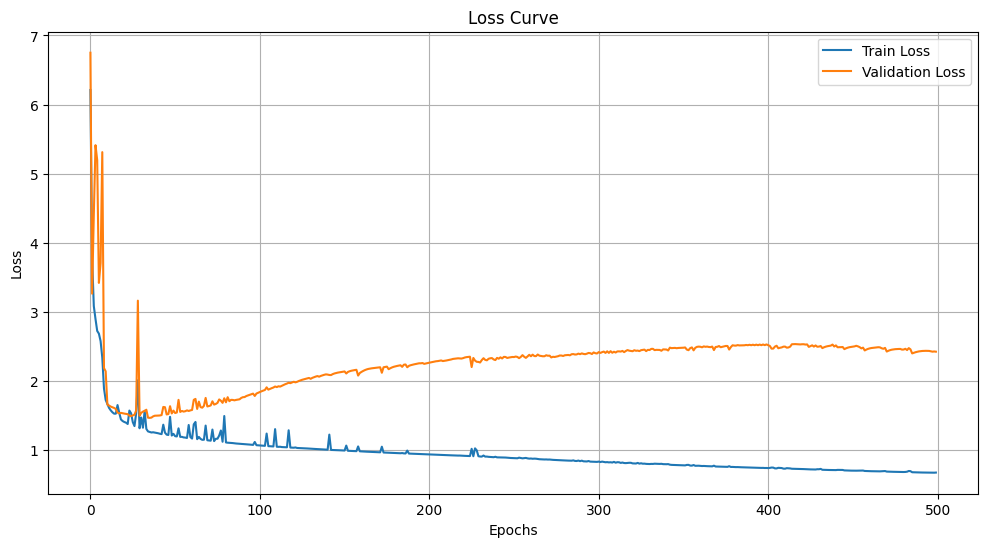

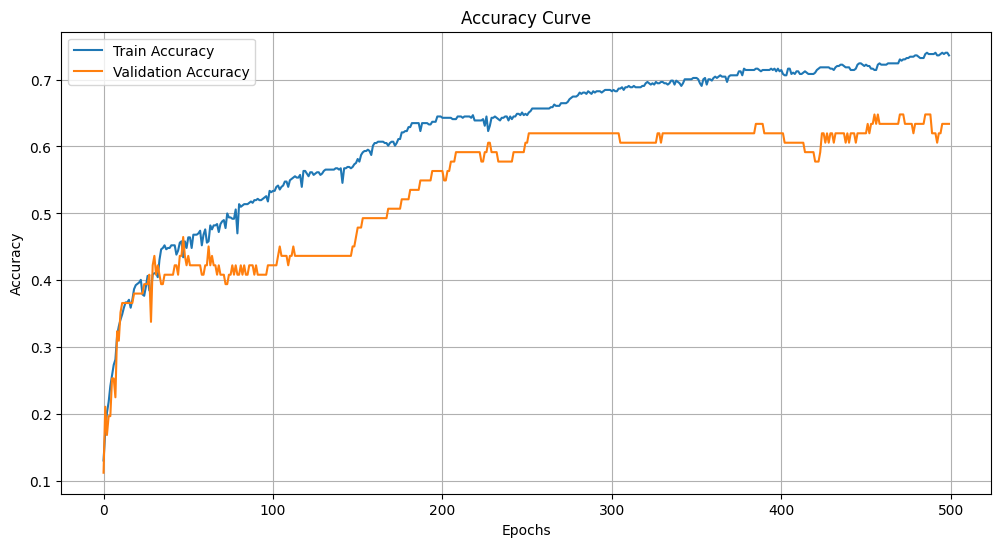

Test Loss: 1.7213222492239855
Test Accuracy: 66.20689655172414%
Total Execution Time: 15 minutes and 19 seconds


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import scipy.io as sio
import time

# تابع عضویت گاوسی
def gaussian_membership(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# کلاس لایه عصبی
class NeuralLayer:
    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.weights = np.random.rand(input_size, output_size)
        self.biases = np.random.rand(output_size)
        self.learning_rate = learning_rate

    def forward(self, inputs):
        self.inputs = inputs  # ذخیره ورودی برای استفاده در بک‌پاس
        return np.maximum(0, np.dot(inputs, self.weights) + self.biases)  # ReLU

    def backward(self, output_gradient):
        # محاسبه گرادیان وزن‌ها و بروز رسانی
        input_gradient = np.dot(output_gradient, self.weights.T)
        weights_gradient = np.dot(self.inputs.T, output_gradient)

        # به‌روزرسانی وزن‌ها و بایاس‌ها
        self.weights -= self.learning_rate * weights_gradient
        self.biases -= self.learning_rate * output_gradient.mean(axis=0)

        return input_gradient

# قوانین فازی
def fuzzy_rules(inputs):
    # تعداد قوانین فازی را با تعداد نورون‌ها تطبیق دهید (مثلاً 32 قانون)
    rules = []
    for i in range(32):  # تعداد قوانین = 32
        rule = gaussian_membership(inputs[:, i % inputs.shape[1]], i, 0.5)
        rules.append(rule)
    return np.array(rules).T  # خروجی با شکل (504, 32)

def fusion_layer(rule_outputs, neural_outputs):
    # ترکیب خروجی فازی و عصبی با وزن‌دهی
    weights_fuzzy = 0.5
    weights_neural = 0.5
    return weights_fuzzy * rule_outputs + weights_neural * neural_outputs

def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True)  # کم کردن مقدار بیشینه از هر سطر
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=1, keepdims=True)


# تابع هزینه MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def cross_entropy_loss(y_true, y_pred):
    # y_pred شامل مقادیر خروجی softmax است
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# تابع محاسبه دقت
def accuracy(y_true, y_pred):
    # برچسب‌ها را بر اساس بیشترین احتمال پیدا کنید
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    return np.mean(y_true_classes == y_pred_classes)


# کلاس HFDNN
class HFDNN:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        # لایه‌های عصبی
        self.layers = [NeuralLayer(input_size, hidden_sizes[0], learning_rate)]
        for i in range(1, len(hidden_sizes)):
            self.layers.append(NeuralLayer(hidden_sizes[i-1], hidden_sizes[i], learning_rate))
        self.output_layer = NeuralLayer(hidden_sizes[-1], output_size, learning_rate)

    def forward(self, inputs):
        neural_outputs = inputs
        for layer in self.layers:
            neural_outputs = layer.forward(neural_outputs)

        fuzzy_outputs = fuzzy_rules(inputs)
        fused_output = fusion_layer(fuzzy_outputs, neural_outputs)
        final_output = self.output_layer.forward(fused_output)
        return softmax(final_output)  # اعمال softmax


    def backward(self, y_true, y_pred):
        # گرادیان برای Cross-Entropy با Softmax
        output_gradient = (y_pred - y_true) / y_true.shape[0]
        hidden_gradient = self.output_layer.backward(output_gradient)

        # بک‌پراپگیشن برای لایه‌های مخفی
        for layer in reversed(self.layers):
            hidden_gradient = layer.backward(hidden_gradient)

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []

        num_samples = X_train.shape[0]
        best_val_loss = float('inf')  # مقدار اولیه برای بهترین Validation Loss

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_accuracy = 0
            for i in range(0, num_samples, batch_size):
                # انتخاب Mini-Batch
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                # فوروارد پاس برای Mini-Batch
                y_pred = self.forward(X_batch)

                # محاسبه Loss و Accuracy برای Mini-Batch
                batch_loss = cross_entropy_loss(y_batch, y_pred)
                batch_accuracy = accuracy(y_batch, y_pred)

                # بک‌پراپگیشن
                self.backward(y_batch, y_pred)

                # جمع‌آوری Loss و Accuracy
                epoch_loss += batch_loss * X_batch.shape[0]
                epoch_accuracy += batch_accuracy * X_batch.shape[0]

            # محاسبه میانگین Loss و Accuracy برای کل Epoch
            epoch_loss /= num_samples
            epoch_accuracy /= num_samples

            # فوروارد پاس و ارزیابی روی مجموعه اعتبارسنجی
            y_val_pred = self.forward(X_val)
            val_loss = cross_entropy_loss(y_val, y_val_pred)
            val_accuracy = accuracy(y_val, y_val_pred)

            # نمایش نتایج هر 100 دوره
            if epoch % 100 == 0:

                # ذخیره نتایج
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_accuracy)
                val_losses.append(val_loss)
                val_accuracies.append(val_accuracy)

                print(f"Epoch {epoch}")
                print(f"Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy * 100:.2f}%")
                print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")
                print(f"====================================================")

        return train_losses, train_accuracies, val_losses, val_accuracies

# ثبت زمان شروع
start_time = time.time()

# بارگذاری داده‌ها
data = sio.loadmat('input_a2.mat')  # نام فایل داده ورودی
labels = sio.loadmat('label.mat')    # نام فایل برچسب‌ها

# فرض بر این است که داده‌ها در keys 'a_input' و 'label' وجود دارند
X = data['input']
y = labels['label'].flatten()  # تبدیل به آرایه یک بعدی

# تبدیل برچسب‌ها به one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# فرض بر این است که شما داده‌های X_train و y_train را از فایل‌ها بارگذاری کرده‌اید
# تقسیم داده‌ها به مجموعه‌های آموزش، اعتبارسنجی و تست
from sklearn.model_selection import train_test_split

# فرض بر این است که داده‌ها به شکل numpy array هستند
# تقسیم داده‌ها: 70% آموزش، 10% اعتبارسنجی، 20% تست
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y_onehot)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42, stratify=y_temp)  # 0.6667 * 0.3 = 0.2

# نرمال‌سازی داده‌های ورودی
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# پارامترهای اصلاح‌شده برای معماری
hidden_sizes = [64, 32]  # تعداد نورون‌ها در لایه‌های پنهان
output_size = 6
learning_rate =4e-5
batch_size = 32  # تعداد نمونه‌ها در هر Batch

# ایجاد مدل و آموزش
hfdnn = HFDNN(input_size=72, hidden_sizes=hidden_sizes, output_size=output_size, learning_rate=learning_rate)
train_losses, train_accuracies, val_losses, val_accuracies = hfdnn.train(
    X_train, y_train, X_val, y_val, epochs=50000, batch_size=batch_size)

# ارزیابی مدل بر روی مجموعه اعتبارسنجی
y_val_pred = hfdnn.forward(X_val)
val_loss = cross_entropy_loss(y_val, y_val_pred)
print(f'Validation Loss: {val_loss}')
val_accuracy = accuracy(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100}%')


# رسم نمودار Loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار Accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

y_test_pred = hfdnn.forward(X_test)
test_loss = cross_entropy_loss(y_test, y_test_pred)
print(f'Test Loss: {test_loss}')
test_accuracy = accuracy(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100}%')

# ثبت زمان پایان
end_time = time.time()

# محاسبه و چاپ مدت زمان اجرا
execution_time = end_time - start_time
minutes = int(execution_time // 60)  # تقسیم زمان بر 60 برای محاسبه دقیقه
seconds = int(execution_time % 60)  # محاسبه باقی‌مانده برای ثانیه‌ها

# چاپ زمان اجرا به صورت دقیقه و ثانیه
print(f"Total Execution Time: {minutes} minutes and {seconds} seconds")


Epoch 0
Loss: 15.4972, Train Accuracy: 15.48%
Validation Loss: 16.8273, Validation Accuracy: 15.49%
Epoch 100
Loss: 10.0625, Train Accuracy: 15.87%
Validation Loss: 12.9818, Validation Accuracy: 16.90%
Epoch 200
Loss: 8.0931, Train Accuracy: 16.07%
Validation Loss: 7.7863, Validation Accuracy: 15.49%
Epoch 300
Loss: 7.5449, Train Accuracy: 13.89%
Validation Loss: 9.1915, Validation Accuracy: 16.90%
Epoch 400
Loss: 6.1170, Train Accuracy: 14.88%
Validation Loss: 6.6115, Validation Accuracy: 15.49%
Epoch 500
Loss: 5.1817, Train Accuracy: 16.47%
Validation Loss: 7.8656, Validation Accuracy: 16.90%
Epoch 600
Loss: 3.9685, Train Accuracy: 18.45%
Validation Loss: 4.9825, Validation Accuracy: 14.08%
Epoch 700
Loss: 4.3251, Train Accuracy: 20.44%
Validation Loss: 5.6390, Validation Accuracy: 16.90%
Epoch 800
Loss: 3.3489, Train Accuracy: 24.01%
Validation Loss: 3.3479, Validation Accuracy: 25.35%
Epoch 900
Loss: 3.1210, Train Accuracy: 27.38%
Validation Loss: 2.9160, Validation Accuracy: 33.80

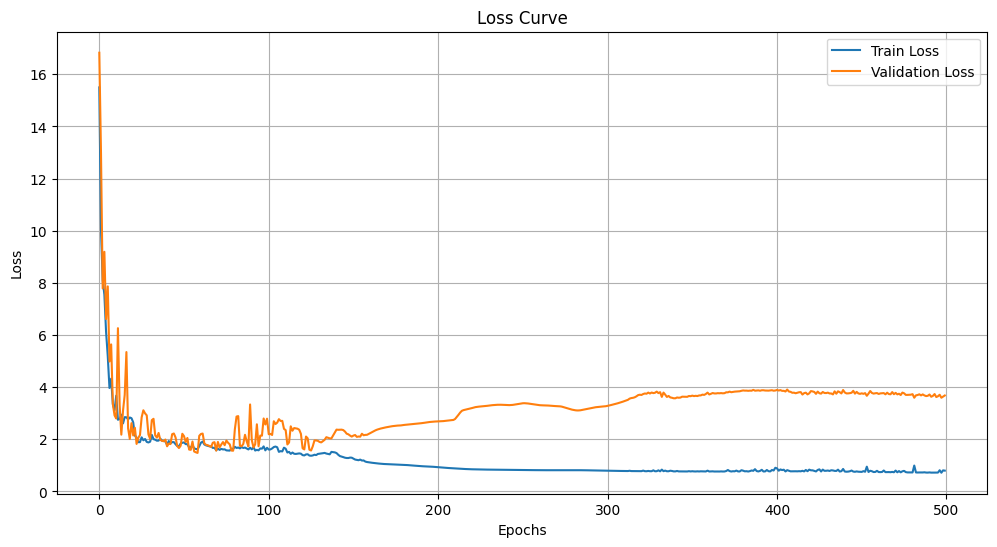

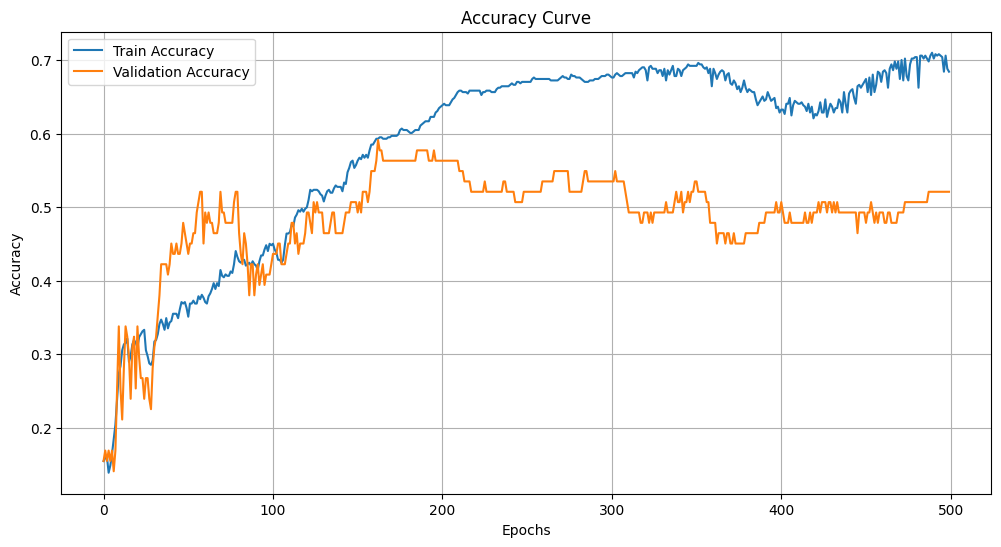

Test Loss: 2.521771239572442
Test Accuracy: 54.48275862068965%
Total Execution Time: 20 minutes and 13 seconds


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import scipy.io as sio
import time

# تابع عضویت گاوسی
def gaussian_membership(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# کلاس لایه عصبی
class NeuralLayer:
    def __init__(self, input_size, output_size, learning_rate=0.01):
        self.weights = np.random.rand(input_size, output_size)
        self.biases = np.random.rand(output_size)
        self.learning_rate = learning_rate

    def forward(self, inputs):
        self.inputs = inputs  # ذخیره ورودی برای استفاده در بک‌پاس
        return np.maximum(0, np.dot(inputs, self.weights) + self.biases)  # ReLU

    def backward(self, output_gradient):
        # محاسبه گرادیان وزن‌ها و بروز رسانی
        input_gradient = np.dot(output_gradient, self.weights.T)
        weights_gradient = np.dot(self.inputs.T, output_gradient)

        # به‌روزرسانی وزن‌ها و بایاس‌ها
        self.weights -= self.learning_rate * weights_gradient
        self.biases -= self.learning_rate * output_gradient.mean(axis=0)

        return input_gradient

# قوانین فازی
def fuzzy_rules(inputs):
    # تعداد قوانین فازی را با تعداد نورون‌ها تطبیق دهید (مثلاً 32 قانون)
    rules = []
    for i in range(32):  # تعداد قوانین = 32
        rule = gaussian_membership(inputs[:, i % inputs.shape[1]], i, 0.5)
        rules.append(rule)
    return np.array(rules).T  # خروجی با شکل (504, 32)

# def fusion_layer(rule_outputs, neural_outputs):
#     # ترکیب خروجی فازی و عصبی با وزن‌دهی
#     weights_fuzzy = 0.5
#     weights_neural = 0.5
#     return weights_fuzzy * rule_outputs + weights_neural * neural_outputs

def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True)  # کم کردن مقدار بیشینه از هر سطر
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=1, keepdims=True)


# تابع هزینه MSE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def cross_entropy_loss(y_true, y_pred):
    # y_pred شامل مقادیر خروجی softmax است
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# تابع محاسبه دقت
def accuracy(y_true, y_pred):
    # برچسب‌ها را بر اساس بیشترین احتمال پیدا کنید
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    return np.mean(y_true_classes == y_pred_classes)


class HFDNN:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        # لایه‌های عصبی
        self.layers = [NeuralLayer(input_size, hidden_sizes[0], learning_rate)]
        for i in range(1, len(hidden_sizes)):
            self.layers.append(NeuralLayer(hidden_sizes[i-1], hidden_sizes[i], learning_rate))
        self.output_layer = NeuralLayer(hidden_sizes[-1], output_size, learning_rate)

        # وزن‌ها و بایاس‌های لایه همجوشی
        self.weights_fuzzy = np.random.rand(hidden_sizes[-1], hidden_sizes[-1])
        self.weights_neural = np.random.rand(hidden_sizes[-1], hidden_sizes[-1])
        self.biases_fusion = np.random.rand(hidden_sizes[-1])
        self.learning_rate = learning_rate

    def fusion_layer(self, fuzzy_outputs, neural_outputs, gradients=None):
        # ترکیب وزن‌دهی شده نمایش فازی و عصبی
        fused_output = (
            (self.weights_fuzzy @ fuzzy_outputs.T).T +
            (self.weights_neural @ neural_outputs.T).T +
            self.biases_fusion
        )

        # اگر گرادیان داده شده باشد، به‌روزرسانی وزن‌ها انجام شود
        if gradients is not None:
            grad_weights_fuzzy = fuzzy_outputs.T @ gradients
            grad_weights_neural = neural_outputs.T @ gradients
            grad_biases_fusion = np.sum(gradients, axis=0)

            # به‌روزرسانی وزن‌ها و بایاس‌ها
            self.weights_fuzzy -= self.learning_rate * grad_weights_fuzzy
            self.weights_neural -= self.learning_rate * grad_weights_neural
            self.biases_fusion -= self.learning_rate * grad_biases_fusion

        # خروجی با تابع فعال‌سازی (ReLU)
        return np.maximum(0, fused_output)

    def forward(self, inputs):
        # فوروارد پاس از لایه‌های عصبی
        self.neural_outputs = inputs
        for layer in self.layers:
            self.neural_outputs = layer.forward(self.neural_outputs)

        # قوانین فازی و همجوشی
        self.fuzzy_outputs = fuzzy_rules(inputs)
        fused_output = self.fusion_layer(self.fuzzy_outputs, self.neural_outputs)

        # خروجی نهایی
        final_output = self.output_layer.forward(fused_output)
        return softmax(final_output)

    def backward(self, y_true, y_pred):
        # گرادیان برای Cross-Entropy
        output_gradient = (y_pred - y_true) / y_true.shape[0]
        hidden_gradient = self.output_layer.backward(output_gradient)

        # بک‌پراپگیشن به لایه همجوشی
        self.fusion_layer(self.fuzzy_outputs, self.neural_outputs, gradients=hidden_gradient)

        # بک‌پراپگیشن برای لایه‌های مخفی
        for layer in reversed(self.layers):
            hidden_gradient = layer.backward(hidden_gradient)

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        train_losses, train_accuracies = [], []
        val_losses, val_accuracies = [], []

        num_samples = X_train.shape[0]
        best_val_loss = float('inf')  # مقدار اولیه برای بهترین Validation Loss

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_accuracy = 0
            for i in range(0, num_samples, batch_size):
                # انتخاب Mini-Batch
                X_batch = X_train[i:i + batch_size]
                y_batch = y_train[i:i + batch_size]

                # فوروارد پاس برای Mini-Batch
                y_pred = self.forward(X_batch)

                # محاسبه Loss و Accuracy برای Mini-Batch
                batch_loss = cross_entropy_loss(y_batch, y_pred)
                batch_accuracy = accuracy(y_batch, y_pred)

                # بک‌پراپگیشن
                self.backward(y_batch, y_pred)

                # جمع‌آوری Loss و Accuracy
                epoch_loss += batch_loss * X_batch.shape[0]
                epoch_accuracy += batch_accuracy * X_batch.shape[0]

            # محاسبه میانگین Loss و Accuracy برای کل Epoch
            epoch_loss /= num_samples
            epoch_accuracy /= num_samples

            # فوروارد پاس و ارزیابی روی مجموعه اعتبارسنجی
            y_val_pred = self.forward(X_val)
            val_loss = cross_entropy_loss(y_val, y_val_pred)
            val_accuracy = accuracy(y_val, y_val_pred)

            # نمایش نتایج هر 100 دوره
            if epoch % 100 == 0:

                # ذخیره نتایج
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_accuracy)
                val_losses.append(val_loss)
                val_accuracies.append(val_accuracy)

                print(f"Epoch {epoch}")
                print(f"Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy * 100:.2f}%")
                print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")
                print(f"====================================================")

        return train_losses, train_accuracies, val_losses, val_accuracies

# ثبت زمان شروع
start_time = time.time()

# بارگذاری داده‌ها
data = sio.loadmat('input_a2.mat')  # نام فایل داده ورودی
labels = sio.loadmat('label.mat')    # نام فایل برچسب‌ها

# فرض بر این است که داده‌ها در keys 'a_input' و 'label' وجود دارند
X = data['input']
y = labels['label'].flatten()  # تبدیل به آرایه یک بعدی

# تبدیل برچسب‌ها به one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# فرض بر این است که شما داده‌های X_train و y_train را از فایل‌ها بارگذاری کرده‌اید
# تقسیم داده‌ها به مجموعه‌های آموزش، اعتبارسنجی و تست
from sklearn.model_selection import train_test_split

# فرض بر این است که داده‌ها به شکل numpy array هستند
# تقسیم داده‌ها: 70% آموزش، 10% اعتبارسنجی، 20% تست
X_train, X_temp, y_train, y_temp = train_test_split(X, y_onehot, test_size=0.3, random_state=42, stratify=y_onehot)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42, stratify=y_temp)  # 0.6667 * 0.3 = 0.2

# نرمال‌سازی داده‌های ورودی
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# پارامترهای اصلاح‌شده برای معماری
hidden_sizes = [64, 32]  # تعداد نورون‌ها در لایه‌های پنهان
output_size = 6
learning_rate = 4e-5
batch_size = 32  # تعداد نمونه‌ها در هر Batch

# ایجاد مدل و آموزش
hfdnn = HFDNN(input_size=72, hidden_sizes=hidden_sizes, output_size=output_size, learning_rate=learning_rate)
train_losses, train_accuracies, val_losses, val_accuracies = hfdnn.train(
    X_train, y_train, X_val, y_val, epochs=50000, batch_size=batch_size)

# ارزیابی مدل بر روی مجموعه اعتبارسنجی
y_val_pred = hfdnn.forward(X_val)
val_loss = cross_entropy_loss(y_val, y_val_pred)
print(f'Validation Loss: {val_loss}')
val_accuracy = accuracy(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100}%')


# رسم نمودار Loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# رسم نمودار Accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

y_test_pred = hfdnn.forward(X_test)
test_loss = cross_entropy_loss(y_test, y_test_pred)
print(f'Test Loss: {test_loss}')
test_accuracy = accuracy(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100}%')

# ثبت زمان پایان
end_time = time.time()

# محاسبه و چاپ مدت زمان اجرا
execution_time = end_time - start_time
minutes = int(execution_time // 60)  # تقسیم زمان بر 60 برای محاسبه دقیقه
seconds = int(execution_time % 60)  # محاسبه باقی‌مانده برای ثانیه‌ها

# چاپ زمان اجرا به صورت دقیقه و ثانیه
print(f"Total Execution Time: {minutes} minutes and {seconds} seconds")
